<a href="https://colab.research.google.com/github/JhojanSanchez331/Seminario-Big-Data/blob/main/cars_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cars price prediction
[Author: Elias Buitrago Bolivar](https://github.com/ebuitrago?tab=repositories)

The objective of this jupyter notebook is to train a machine learning algorithm to predict a car's price, based on known characteristics. The training data was obtained by web scraping, using Selenium and Beautiful Soap from tucarro.com.co; This project has no commercial purposes its for merely academic endeavor.
_Updated: June 22th, 2024_

## Data understanding

### Import libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load data

In [67]:
cols = ['model','price','year','kms','color','fueltype']
data = pd.read_csv('usedCarsCol_sail - copia.csv', sep=',', names=cols, header=0, encoding='latin-1')
print(data.shape)
data.head()


(420, 6)


,model,price,year,kms,color,fueltype
0,Chevrolet Sail 1.4l MecÃ¡nica,43500000,2019,224690,Amarillo,Gasolina
1,Chevrolet Sail 1.4 Ltz,41800000,2020,49000,Gris,Gasolina
2,Chevrolet Sail 1.4 Lt,41000000,2020,29250,Blanco,Gasolina
3,Chevrolet Sail 1.4 Ltz,41000000,2018,35847,Azul,Gasolina
4,Chevrolet Sail 1.4 Ltz,40000000,2018,20000,Gris,Gasolina


### Verify data types

In [68]:
data.dtypes

model       object
price        int64
year         int64
kms          int64
color       object
fueltype    object
dtype: object

### Count unique values for each variable

In [69]:
data.nunique()

model        36
price        87
year          9
kms         244
color        10
fueltype      2
dtype: int64

In [70]:
print(data['model'].unique().tolist())
print(data['price'].unique().tolist())
print(data['year'].unique().tolist())
print(data['kms'].unique().tolist())
print(data['color'].unique().tolist())
print(data['fueltype'].unique().tolist())

['Chevrolet Sail 1.4l MecÃ¡nica', 'Chevrolet Sail 1.4 Ltz', 'Chevrolet Sail 1.4 Lt', 'Chevrolet Sail 1.4 Ls', 'Chevrolet Sail Ltz 2018 Ltz', 'Chevrolet Sail 1.4 LS con Aire', 'Chevrolet Sail 1.4 Ltz Limited', 'Chevrolet Sail 1.4 Ls MecÃ¡nica', 'Chevrolet Captiva 2.4 Sport 182 hp', 'Chevrolet Sail 1.4 Ltz Sport', 'Chevrolet Sail 1.4 Ls mecÃ¡nica con A/C', 'Chevrolet Sail Ls', 'Chevrolet Sail 1.4 Lt Hb Mecanico', 'Chevrolet Sail Sail 2019', 'Chevrolet Sail 1.4 Ltz Mt', 'Chevrolet Sail 1.4 Ls AutomÃ¡tica', 'Chevrolet Sail 1.4 Lt 4 p', 'Chevrolet Sail ls Ls', 'Chevrolet Sail ltz 1.4', 'Chevrolet Sail 1.4 LS Mecanico Sedan', 'Chevrolet Sail 1.4 Lt 5 p', 'Chevrolet Sail 1.4l', 'Chevrolet Sail Ls  1400cc Mt Aa', 'Chevrolet Sail ltz 5p sport', 'Chevrolet Sail 1.4 Ltz 4 p', 'Chevrolet Sail Ltz', 'Chevrolet Sail 1.4 Ltz (financiamiento) Unico DueÃ±o', 'Chevrolet Sail 1.4 Lt Sport', 'Chevrolet Sail .', 'Chevrolet Sail 1.4 ls mecÃ¡nico', 'Chevrolet Sail', 'Chevrolet Sail Hb 1.4', 'Chevrolet Sail 1

### Data transformation

In [71]:
# Copy data and remove model variable
datacc = data
datacc = datacc.drop(['model'], axis=1)
datacc.shape

(420, 5)

#### Transform $price$ to numerical

In [72]:
datacc['price'] = datacc['price'].astype(str).str.replace(r'[$.]', '', regex=True).astype(int)

##### Transform $kms$ to numerical

In [73]:
datacc['kms'] = datacc['kms'].astype(str).str.replace(r'[.]', '',regex=True).astype(int)

In [74]:
datacc.replace({'kms': {'Publicado': 0}}, inplace=True)

In [75]:
datacc['kms'] = datacc['kms'].replace('[.]','',regex=True).astype(int)

##### Transform categorical variables to dummies: $year$ and $fuel type$

In [76]:
# Object to categorical
datacc['color'] = datacc['color'].astype('category')
datacc['fueltype'] = datacc['fueltype'].astype('category')
datacc.dtypes

price          int64
year           int64
kms            int64
color       category
fueltype    category
dtype: object

In [77]:
# Convert to dummies
# Convert category to codes
datacc['color']  = pd.Categorical(datacc['color']).codes
datacc['fueltype']  = pd.Categorical(datacc['fueltype']).codes
datacc.head()

,price,year,kms,color,fueltype
0,43500000,2019,224690,0,0
1,41800000,2020,49000,6,0
2,41000000,2020,29250,2,0
3,41000000,2018,35847,1,0
4,40000000,2018,20000,6,0


## Data Exploration

In [78]:
# Descriptive statistics
datacc.describe()[['price','year','kms']]

,price,year,kms
count,4.200000e+02,420.000000,420.000000
mean,3.042927e+07,2016.061905,90306.378571
std,3.920557e+06,1.859242,36801.937877
min,1.900000e+07,2013.000000,19000.000000
25%,2.780000e+07,2015.000000,67770.000000
50%,3.000000e+07,2016.000000,87500.000000
75%,3.300000e+07,2017.000000,108394.500000
max,4.350000e+07,2022.000000,305705.000000


#### Histograms

Text(0.5, 1.0, '$kms$')

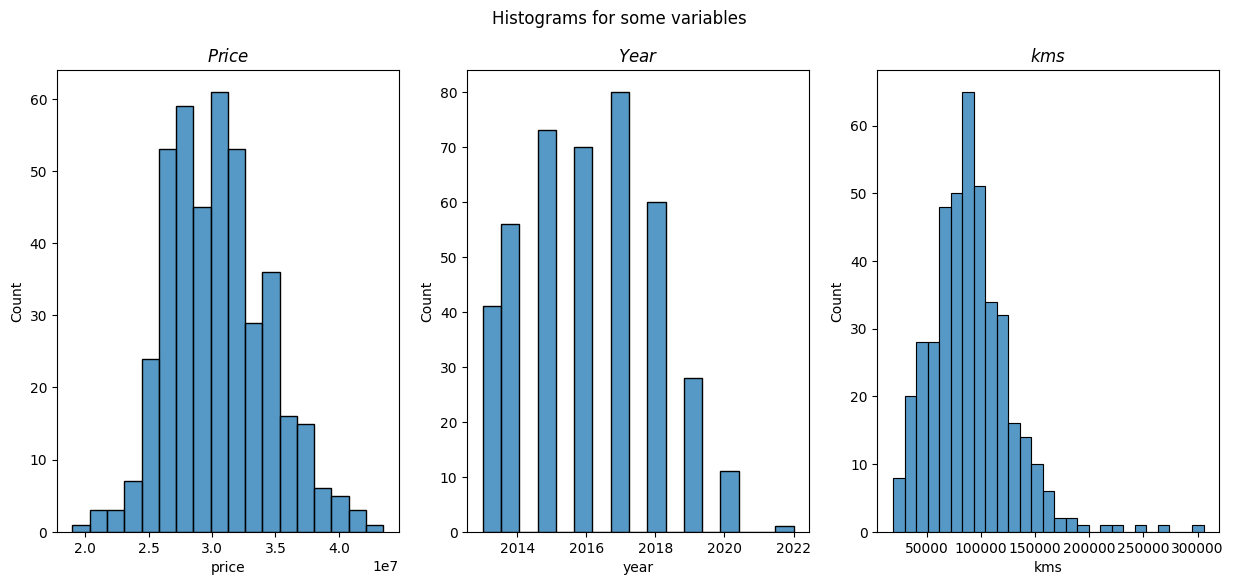

In [79]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

#### Boxplots

<Axes: >

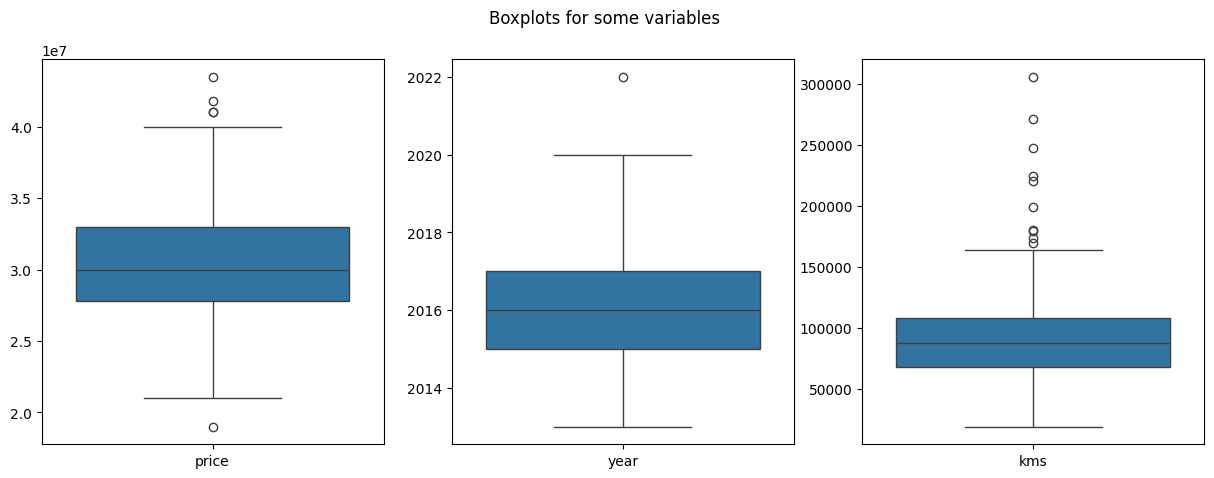

In [80]:
### Boxplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

#### Ouliers treatment
_https://www.statology.org/remove-outliers-python/_  
_https://towardsdatascience.com/a-complete-guide-for-detecting-and-dealing-with-outliers-bad26b1e92b6_  
_https://www.scribbr.com/statistics/outliers/_  
_https://www.statology.org/remove-outliers/_  

<Axes: >

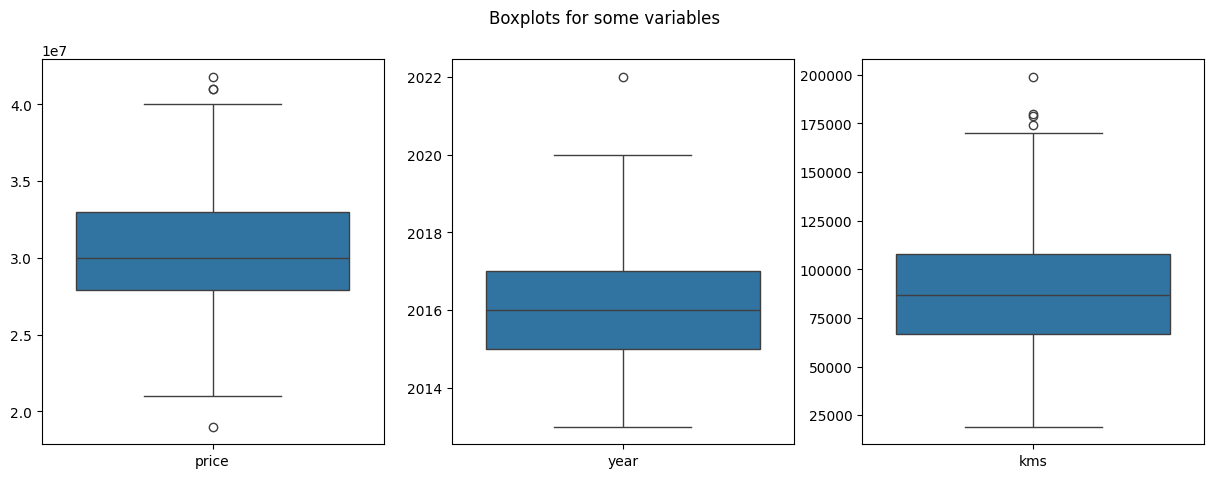

In [81]:
# Z score to eliminate outliers of 'year' and 'kms'
from scipy import stats

#find absolute value of z-score for each observation of 'kms'
z2 = np.abs(stats.zscore(datacc['kms']))

#only keep rows in dataframe with all z-scores less than absolute value of 3
toremove = datacc.kms[(z2>3)].index
datacc = datacc.drop(toremove)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Boxplots for some variables')
sns.boxplot(data=datacc[['price']], ax=ax1)
sns.boxplot(data=datacc[['year']], ax=ax2)
sns.boxplot(data=datacc[['kms']], ax=ax3)

Text(0.5, 1.0, '$kms$')

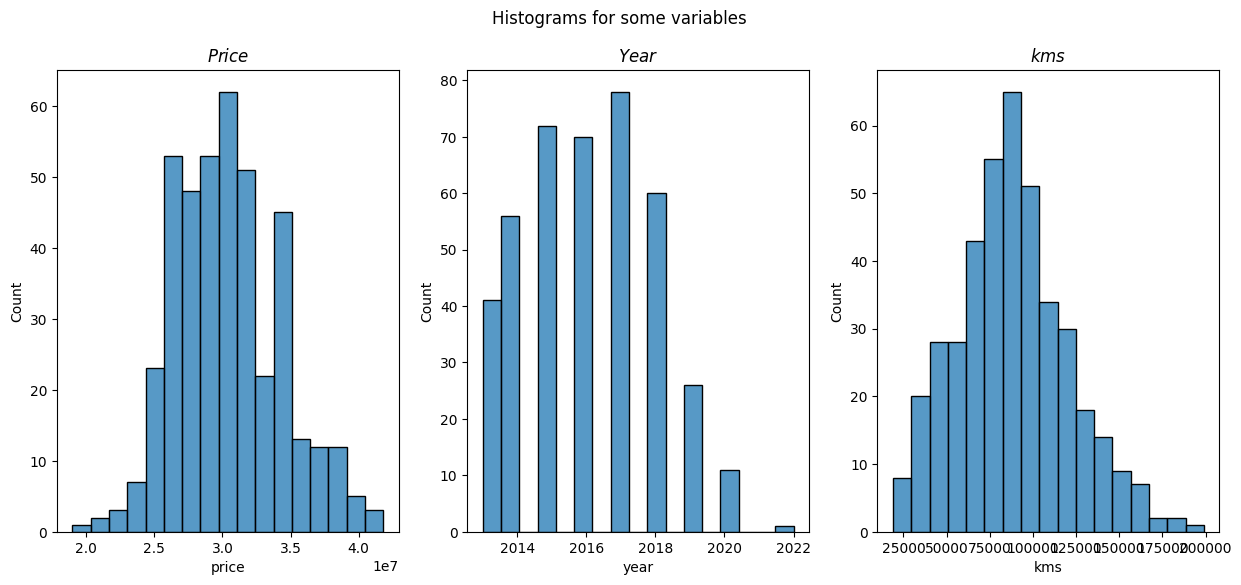

In [82]:
# Histograms
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Histograms for some variables')
sns.histplot(datacc['price'], ax=ax1)
ax1.set_title('$Price$')
sns.histplot(datacc['year'], ax=ax2)
ax2.set_title('$Year$')
sns.histplot(datacc['kms'], ax=ax3)
ax3.set_title('$kms$')

### EDA (Exploratory Data Analysis)

#### Correlations

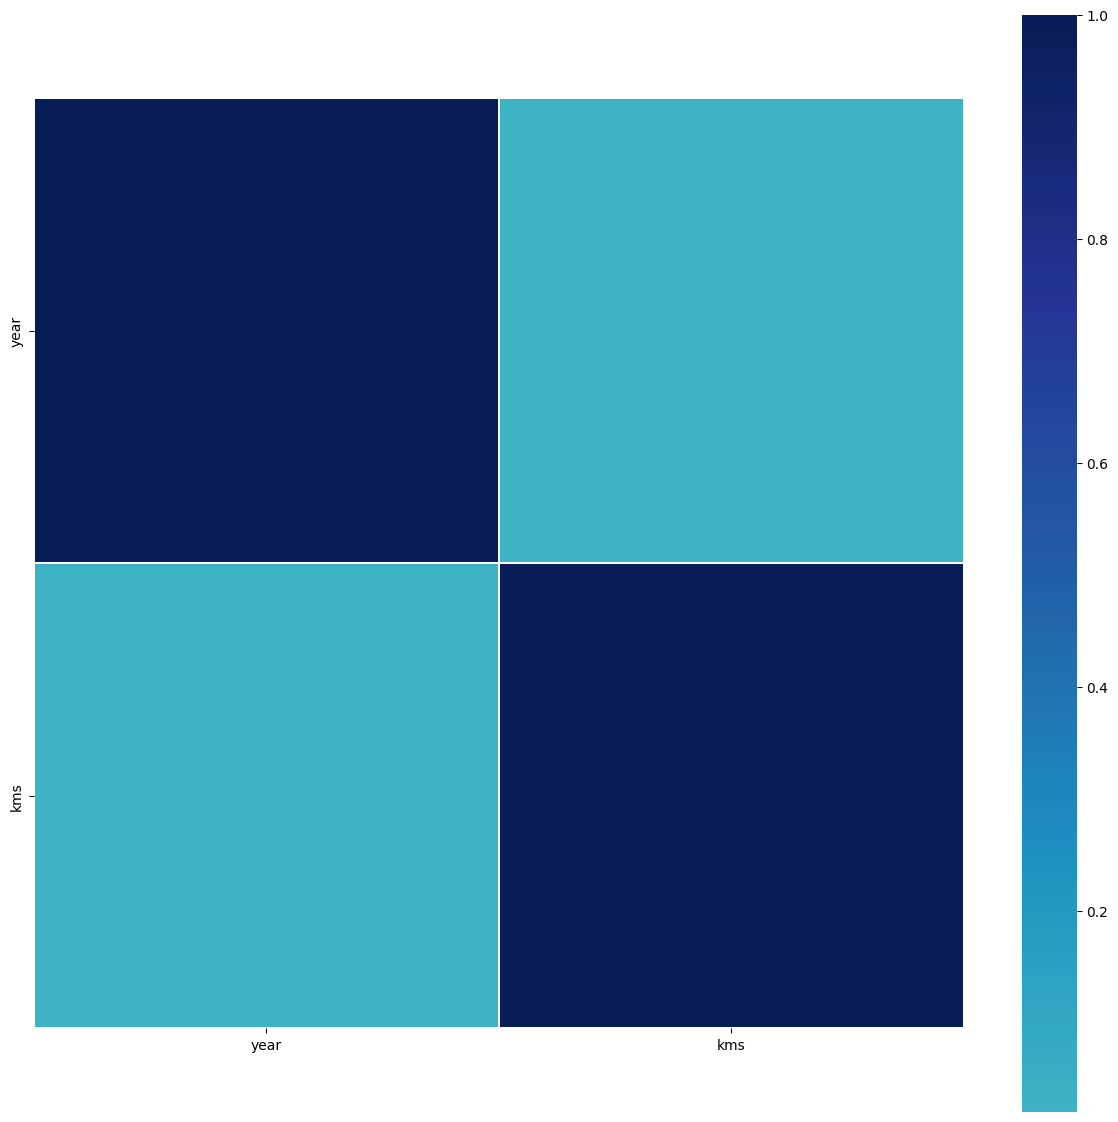

In [83]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.2, annot=False, cbar_kws={"shrink": .95}
                )
    plt.show();

correlation_heatmap(X[['year', 'kms']])

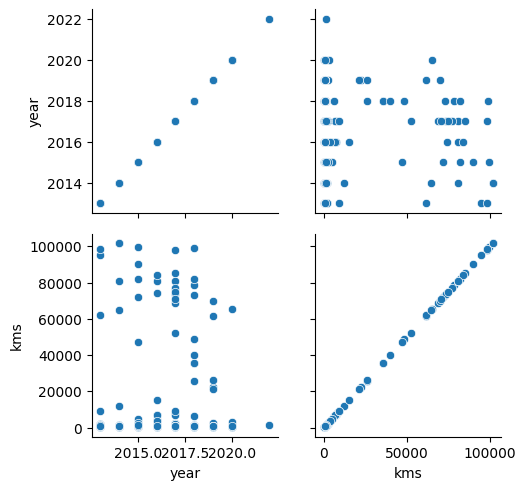

In [84]:
g = sns.PairGrid(X[['year', 'kms']])
g.map(sns.scatterplot)

## Modeling: machine learning

### Libraries

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.metrics import mean_absolute_error as MAE
import pickle

### Data partitioning


In [86]:
X = datacc.copy()
X = X.drop(['price'], axis=1)
print(X.shape)

Y = pd.DataFrame()
Y = datacc['price']
print(Y.shape)

(415, 4)
(415,)


In [87]:
# Data set normalization and partitioning
sc = StandardScaler()
Xsc = sc.fit(X)
Xt = Xsc.transform(X)
Xt.shape

(415, 4)

In [88]:
X_train, X_test, y_train, y_test = split(Xt,Y,
                                         test_size=0.20,
                                         random_state=42)

### Multivariate lineal regression

In [89]:
# Define model and prediction
ols = LinearRegression()
model1 = ols.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [90]:
# accuracy check
rmse = MSE(y_test, y_pred1, squared=False)
mae = MAE(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 2639571.21
MAE: 2058888.86
R2: 0.64


### Light GBM
https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/   
https://www.datatechnotes.com/2022/03/lightgbm-regression-example-in-python.html  

In [91]:
!pip install lightgbm

In [92]:
import lightgbm as lgb

In [93]:
# Hyperparameters
params = {
    'task': 'train',
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'header' : 'true',
    'verbose': 0
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model2 = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval)
# Pred
y_pred2 = model2.predict(X_test)

In [94]:
# accuracy check
rmse = MSE(y_test, y_pred2, squared=False)
mae = MAE(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 3022646.28
MAE: 2428054.25
R2: 0.52


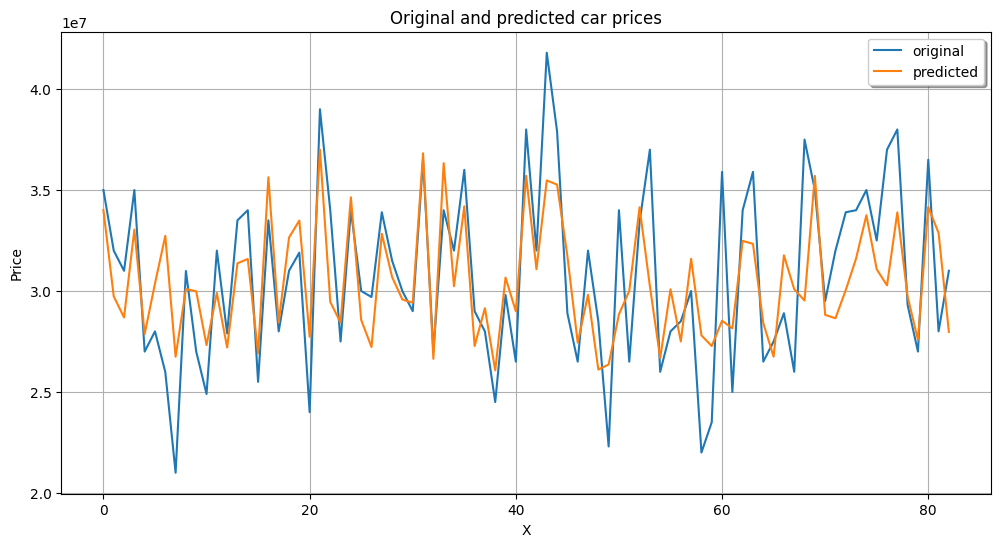

In [95]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred2, label="predicted")
plt.title("Original and predicted car prices")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

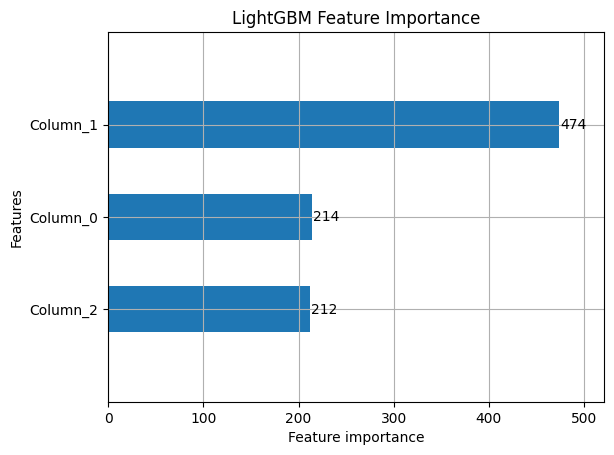

In [96]:
# plotting feature importance
ax = lgb.plot_importance(model2, height=.5, title="LightGBM Feature Importance")


<Axes: >

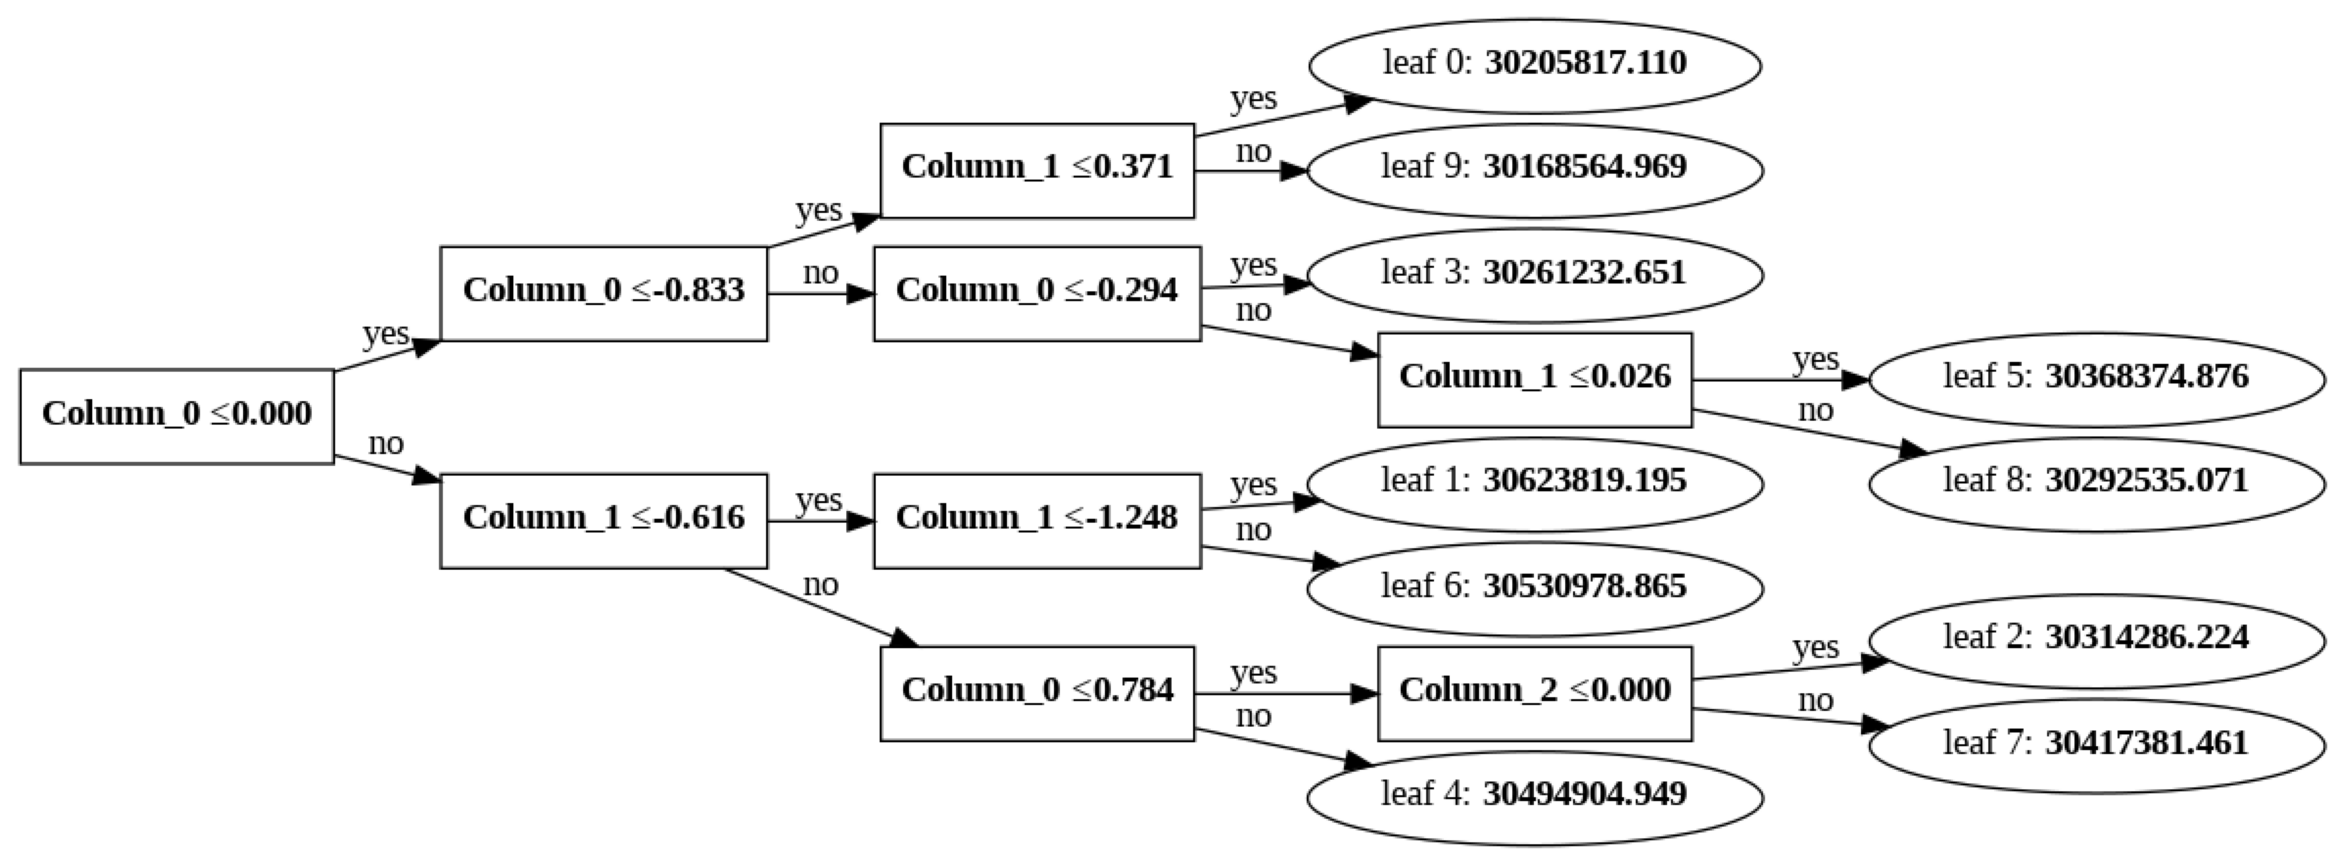

In [97]:
lgb.plot_tree(model2,figsize=(30,40))

### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [100]:
# accuracy check
rmse = MSE(y_test, y_pred3, squared=False)
mae = MAE(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 2982476.32
MAE: 2323320.38
R2: 0.54


**Save the model**

In [101]:
with open('model3.pkl', 'wb') as f:
  pickle.dump(model3, f)

### Xgboost regressor
https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html

In [102]:
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb
from sklearn.metrics import classification_report

In [103]:
#Define model
model4 = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gbtree',
                          colsample_bytree = 1,
                          importance_type='gain',
                          learning_rate = 0.2,
                          max_depth = 5,
                          alpha = 5,
                          n_estimators = 200,
                          seed=123)

In [104]:
#Training
model4.fit(X_train, y_train)#,
#         eval_set=[(X_train, y_train), (X_test, y_test)], \
#         eval_metric='mlogloss', verbose=False)

XGBRegressor(alpha=5, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [105]:
#K-fold cross validation
scores = cross_val_score(model4, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.39


In [106]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model4, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.34


In [107]:
# Pred
y_pred4 = model4.predict(X_test)

In [108]:
# accuracy check
rmse = MSE(y_test, y_pred4, squared=False)
mae = MAE(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)
print("RMSE: %.2f" % rmse)
print("MAE: %.2f" % mae)
print("R2: %.2f" % r2)

RMSE: 3289266.60
MAE: 2564280.41
R2: 0.43


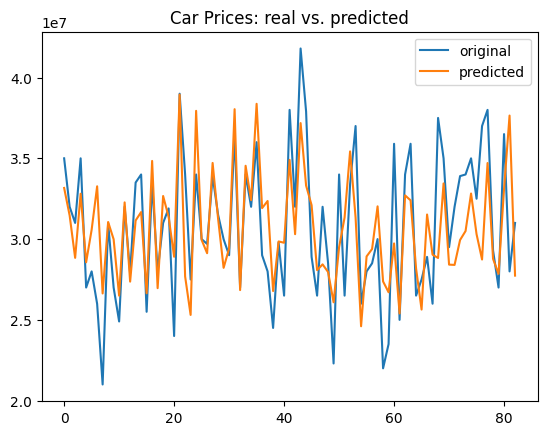

In [109]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred4, label="predicted")
plt.title("Car Prices: real vs. predicted")
plt.legend()
plt.show()